In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
path = "C:/Users/USER/Desktop/backend/ML/final_train.csv"
train = pd.read_csv(path)
train=train.sample(frac=1).reset_index(drop=True)
train.head()



,index,acc_max,agv_max,agv_min,f6,f7,f8,fall,fcount,gyro_max,kurt_acc,kurt_gyro,lin_max,skew_acc,skew_gyro,ADL
0,247,19.155586,0.361533,-0.244481,1.0,7.061176,2.278156,0.0,2.0,2.332864,17.934084,-0.661770,7.143958,2.504044,0.821465,CSI
1,72,24.496454,0.711836,-0.458393,1.0,8.950193,4.831045,1.0,4.0,4.902791,17.533206,1.975576,9.036588,2.881903,1.787386,Fall
2,93,19.996389,4.000000,-0.760618,1.0,1.560820,5.528732,0.0,8.0,10.549985,1.527307,5.712701,10.674674,0.717460,1.905542,STU
3,661,14.998349,0.276562,-0.115753,1.0,4.746455,0.687796,0.0,0.0,2.139293,7.681304,-0.686285,6.047440,1.657113,0.736308,CSO
4,724,16.684436,0.260767,-0.257376,1.0,3.128187,1.214232,0.0,2.0,2.157930,9.139635,0.202059,3.676569,1.924634,1.201084,CSI


In [3]:
y = train.fall
cols_to_del = ['fall','ADL','index','f6','fcount']
X = train.copy()
X= X.drop(cols_to_del,axis=1)
X.head()

,acc_max,agv_max,agv_min,f7,f8,gyro_max,kurt_acc,kurt_gyro,lin_max,skew_acc,skew_gyro
0,19.155586,0.361533,-0.244481,7.061176,2.278156,2.332864,17.934084,-0.661770,7.143958,2.504044,0.821465
1,24.496454,0.711836,-0.458393,8.950193,4.831045,4.902791,17.533206,1.975576,9.036588,2.881903,1.787386
2,19.996389,4.000000,-0.760618,1.560820,5.528732,10.549985,1.527307,5.712701,10.674674,0.717460,1.905542
3,14.998349,0.276562,-0.115753,4.746455,0.687796,2.139293,7.681304,-0.686285,6.047440,1.657113,0.736308
4,16.684436,0.260767,-0.257376,3.128187,1.214232,2.157930,9.139635,0.202059,3.676569,1.924634,1.201084


In [4]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model = LogisticRegression(random_state=0,max_iter=100)

from sklearn import svm


model = svm.SVC(kernel='linear') # Linear Kernel

model.fit(X_train,y_train)
# model = XGBRegressor(n_estimators=800,learning_rate=0.05)
# model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_val,y_val)],verbose=False)
preds = model.predict(X_val)
preds[preds>=0.7]=1
preds[preds<0.7]=0

In [6]:
p = pd.Series(preds,index=y_val.index)

In [7]:
 accuracy = (y_val==p).sum()*100/(p.shape[0])

In [8]:
indices_of_neg = y_val[y_val==1.0].index
predict = p.loc[indices_of_neg]
actual = y.loc[indices_of_neg]
true_negative = (predict==actual).sum()*100/actual.shape[0]
true_negative

93.13304721030043

In [9]:
indices_of_pos = y_val[y_val==0.0].index
predict = p.loc[indices_of_pos]
actual = y.loc[indices_of_pos]

true_positive = (predict==actual).sum()*100/actual.shape[0]
true_positive


93.54838709677419

In [10]:
print("Accuracy: {}%\nTrue Positive: {}%\nTrue Negative: {}%".format(accuracy,true_positive,true_negative))

Accuracy: 93.359375%
True Positive: 93.54838709677419%
True Negative: 93.13304721030043%


In [11]:
import pickle
import joblib

In [14]:
joblib.dump(model,"fall_predict_both.pkl")

['fall_predict_both.pkl']

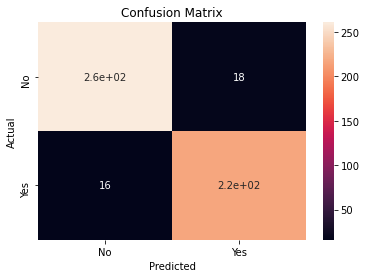

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,p)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax);
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes']);

In [111]:
pre


277

0        0.000
1        0.000
2        0.000
3        0.001
4        0.001
         ...  
1205    11.736
1206    11.746
1207    11.756
1208    11.769
1209    11.776
Name: rel_time, Length: 1210, dtype: float64

0      0.000
1      0.000
2      0.000
3      0.001
4      0.001
       ...  
575    5.406
576    5.416
577    5.426
578    5.436
579    5.446
Name: rel_time, Length: 580, dtype: float64

,acc_max,agv_max,agv_min,f7,f8,gyro_max,kurt_acc,kurt_gyro,lin_max,skew_acc,skew_gyro
285,12.227273,0.123320,-0.098166,1.210738,0.838226,2.343966,2.432502,-0.522451,2.142280,0.984574,0.811317
248,27.149050,0.712099,-1.569536,13.586348,5.181700,5.347245,12.059011,8.326424,13.854186,2.388013,2.842873
547,20.714584,0.627789,-0.559600,0.485909,-0.157766,4.605221,-0.813295,-0.910295,8.546763,0.202807,0.229562
442,29.382416,2.537247,-2.246331,10.706714,6.755986,6.900017,17.592749,13.546734,10.951899,2.906674,3.284626
546,23.021269,0.524744,-0.611789,7.428981,7.099799,7.772748,23.673423,15.814064,8.964549,3.350202,2.712883
...,...,...,...,...,...,...,...,...,...,...,...
1003,28.754587,0.702938,-0.442390,8.915433,6.937758,7.123325,35.780348,7.716472,9.205882,4.755213,2.310926
982,15.217593,0.247555,-0.190381,2.625953,3.994561,4.048245,20.257431,5.504848,2.827150,2.960463,2.336898
1177,21.366846,0.318559,-0.474217,8.222996,1.612236,1.722590,1.986035,0.664172,8.319823,1.121297,1.123083
748,18.548472,0.526191,-0.558715,1.768070,0.092696,3.030944,6.114668,-0.415747,6.726709,1.499747,0.810629


AttributeError: 'Series' object has no attribute 'd'